# Ecommerce Dataset Analysis
> Ask yourself 15 analystical questions that you belive will help the managers in decision making

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/Users/immortal/Desktop/DataScience/DataScienceCourse/Analysis/data/ecommerce.csv')
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART
...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,Hong Kong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU
696,553148,0.55,13.20,24,Hong Kong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL
697,564087,4.95,29.70,6,Hong Kong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY
698,553148,0.85,27.20,32,Hong Kong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       700 non-null    int64  
 1   UnitPrice       700 non-null    float64
 2   OrderValue      700 non-null    float64
 3   Quantit         700 non-null    int64  
 4   Country         700 non-null    object 
 5    InvoiceDate    700 non-null    object 
 6   InvoiceTime     700 non-null    object 
 7   Year-Month      700 non-null    object 
 8   Major Category  700 non-null    object 
 9   Minor Category  700 non-null    object 
 10  Description     700 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.3+ KB


In [5]:
df['Minor Category'].value_counts()

          Tops    63
         Shoes    57
          Hats    56
         Hoses    51
         Rakes    51
         Seeds    47
         Lamps    47
      Curtains    46
          Turf    40
          Rugs    39
        Scales    33
        Plates    33
       Cutlery    32
        Chairs    31
Cooking Knives    25
         Bowls    25
      Coasters    24
Name: Minor Category, dtype: int64

In [6]:
# Which is the most category sold ? 
df['Major Category'].value_counts()

     Garden      189
    Clothes      176
    Kitchen      172
  Household      163
Name: Major Category, dtype: int64

In [7]:
# What is the most country has orders ? --- doesn't mean that it has more profit !
df['Country'].value_counts()

United Kingdom       300
        France       200
       Germany       100
     Australia        50
     Hong Kong        50
Name: Country, dtype: int64

In [16]:
int(df['Year-Month'][0].split('-')[1])

4

In [4]:
# Make a new 2 columns that has a year and month for better analysis
def month(x):
    return int(x['Year-Month'].split('-')[1])
def year(x):
    return int(x['Year-Month'].split('-')[0])
    
df['month']=df.apply(month,axis=1)
df['year']=df.apply(year,axis=1) 
df    

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description,month,year
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN,4,2011
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD,11,2011
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS,4,2011
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE,10,2011
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,Hong Kong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU,8,2011
696,553148,0.55,13.20,24,Hong Kong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL,5,2011
697,564087,4.95,29.70,6,Hong Kong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY,8,2011
698,553148,0.85,27.20,32,Hong Kong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA,5,2011


In [56]:
#what is the most country that has an order value?
df.groupby(['Country'])['OrderValue'].sum().sort_values(ascending=False) #Australia Make a 6349.89

Country
Australia        6349.89
France           5638.16
UnitedKingdom    5582.93
Germany          3153.71
HongKong         1660.24
Name: OrderValue, dtype: float64

In [44]:
df['Country'].unique() # is seems like we need to remove spaces from the country column 


array(['United Kingdom   ', '       Germany   ', '        France   ',
       '     Australia   ', '     Hong Kong   '], dtype=object)

In [5]:
def removespace(x): # function that removes spaces form the string
    str=x['Country']
    str=str.replace(' ', '')
    return str
df['Country']=df.apply(removespace, axis=1)
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description,month,year
0,549185,0.85,10.20,12,UnitedKingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN,4,2011
1,576381,2.95,35.40,12,UnitedKingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD,11,2011
2,551192,1.25,20.00,16,UnitedKingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS,4,2011
3,573553,7.46,7.46,1,UnitedKingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE,10,2011
4,539436,2.51,2.51,1,UnitedKingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,HongKong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU,8,2011
696,553148,0.55,13.20,24,HongKong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL,5,2011
697,564087,4.95,29.70,6,HongKong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY,8,2011
698,553148,0.85,27.20,32,HongKong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA,5,2011


In [6]:
df['Country'].unique() # DONE ! .. lets continue the work :)

array(['UnitedKingdom', 'Germany', 'France', 'Australia', 'HongKong'],
      dtype=object)

In [55]:
# What is the most Major Category that Australia has been ordered ?
df[df['Country']=='Australia'].groupby(['Major Category'])['OrderValue'].sum().sort_values(ascending=False) # The kitchen

Major Category
    Kitchen      2630.58
  Household      1416.78
    Clothes      1230.95
     Garden      1071.58
Name: OrderValue, dtype: float64

In [59]:
# What is the most month  that has a less Value orders ?
df.groupby(['month'])['OrderValue'].sum().sort_values(ascending=True) #Month 4

month
4      588.83
12    1194.22
10    1382.54
7     1562.23
2     1758.76
6     1878.89
1     2080.25
3     2324.19
8     2327.19
9     2339.75
5     2394.34
11    2553.74
Name: OrderValue, dtype: float64

In [67]:
# what is the valueOrders in Major Category of all countries in month 4 ?
df[df['month']==4].groupby(['Country','Major Category'])['OrderValue'].sum() # It seems like Australia(Has the best value Orders) does not make any order in this month we need to check it out !

Country        Major Category
France             Clothes        15.00
                   Kitchen        15.30
Germany             Garden        20.80
                   Kitchen         7.80
                 Household        69.40
HongKong            Garden        12.50
                   Clothes        15.60
                 Household        45.00
UnitedKingdom       Garden        48.28
                   Clothes        80.45
                   Kitchen        38.08
                 Household       220.62
Name: OrderValue, dtype: float64

In [72]:
int(df['InvoiceTime'][0].split(':')[0])

9

In [7]:
def hours(x): #Function that to return the hours
    return x['InvoiceTime'].split(':')[0]
df['hours']=df.apply(hours,axis=1) # Make a new column called Houres 
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description,month,year,hours
0,549185,0.85,10.20,12,UnitedKingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN,4,2011,09
1,576381,2.95,35.40,12,UnitedKingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD,11,2011,09
2,551192,1.25,20.00,16,UnitedKingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS,4,2011,10
3,573553,7.46,7.46,1,UnitedKingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE,10,2011,13
4,539436,2.51,2.51,1,UnitedKingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART,12,2010,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,HongKong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU,8,2011,09
696,553148,0.55,13.20,24,HongKong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL,5,2011,14
697,564087,4.95,29.70,6,HongKong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY,8,2011,09
698,553148,0.85,27.20,32,HongKong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA,5,2011,14


In [76]:
# Which hours has the better seller ?
df.groupby(['hours'])['OrderValue'].sum().sort_values(ascending=False) # its seems like the best hours  was from 9 to 15

hours
   10    3827.16
   13    3503.24
   14    3341.01
   11    2680.28
   15    2656.01
   09    2610.96
   12    1847.00
   08     950.88
   16     408.34
   17     276.38
   07     244.80
   19      21.00
   18      14.92
   20       2.95
Name: OrderValue, dtype: float64

In [77]:
# What is  a piviot table that shows The orderVolumes for each hours indexed by the country
df.pivot_table(values='OrderValue' , index='Country' , columns='hours') # we notice that there is no order between 18 to 20 in most contries , so we can do some offers in this time to attrcat customers

hours,07,08,09,10,11,12,13,14,15,16,17,18,19,20
Country,,,,,,,,,,,,,,
Australia,NaN,180.560000,82.605714,172.702222,126.70500,42.665000,168.450000,57.650000,142.534286,NaN,NaN,NaN,NaN,NaN
France,244.8,26.896000,27.832105,21.141613,60.54625,22.179630,23.098710,23.449286,23.895294,13.424000,21.250000,NaN,NaN,NaN
Germany,NaN,26.870000,36.286364,41.400667,22.60375,16.872500,29.849500,49.298571,23.776923,16.500000,15.000000,NaN,NaN,NaN
HongKong,NaN,23.400000,40.750000,15.000000,NaN,14.884286,NaN,34.626000,NaN,NaN,NaN,NaN,NaN,NaN
UnitedKingdom,NaN,23.973333,19.685217,39.257600,16.86000,13.989796,14.873235,20.883721,22.998780,8.658182,10.730526,4.973333,10.5,2.95


(array([157.,  95., 114., 179.,  19.,  38.,  91.,   3.,   2.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

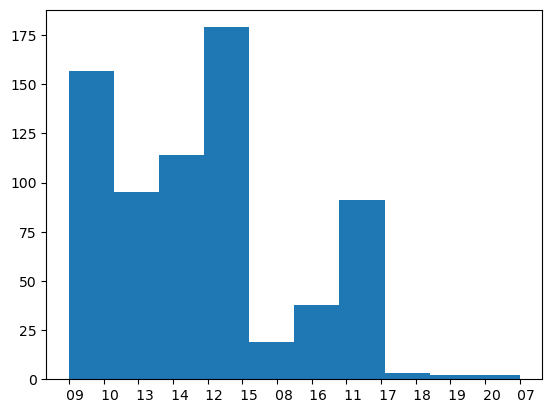

In [79]:
plt.hist(df['hours']) # The histogram shows that the best hours was from 9 to 15 as we mention before

<AxesSubplot:xlabel='Country', ylabel='OrderValue'>

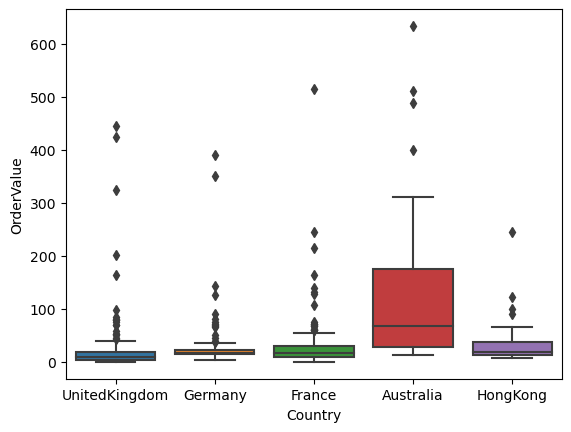

In [84]:
sns.boxplot(x='Country',y='OrderValue',data=df  ) # The boxplot shows that the best contry which made an order was Australia

In [87]:
# What is the most year that has order and which country is the best at this year ?
df.groupby(['year','Country'])['OrderValue'].sum() # it seems like the 2011  is the best year ,, and the best in this year was Australia 

year  Country      
2010  Australia         147.50
      France            128.33
      Germany           227.70
      UnitedKingdom     291.81
2011  Australia        6202.39
      France           5509.83
      Germany          2926.01
      HongKong         1660.24
      UnitedKingdom    5291.12
Name: OrderValue, dtype: float64

In [8]:
df

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description,month,year,hours
0,549185,0.85,10.20,12,UnitedKingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN,4,2011,09
1,576381,2.95,35.40,12,UnitedKingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD,11,2011,09
2,551192,1.25,20.00,16,UnitedKingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS,4,2011,10
3,573553,7.46,7.46,1,UnitedKingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE,10,2011,13
4,539436,2.51,2.51,1,UnitedKingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART,12,2010,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,564087,1.25,20.00,16,HongKong,23/8/11,09:38,2011-08,Clothes,Tops,WOOD STAMP SET THANK YOU,8,2011,09
696,553148,0.55,13.20,24,HongKong,13/5/11,14:09,2011-05,Garden,Hoses,GREEN POLKADOT BOWL,5,2011,14
697,564087,4.95,29.70,6,HongKong,23/8/11,09:38,2011-08,Garden,Rakes,TOY TIDY SPACEBOY,8,2011,09
698,553148,0.85,27.20,32,HongKong,13/5/11,14:09,2011-05,Kitchen,Cooking Knives,RED RETROSPOT CHILDRENS UMBRELLA,5,2011,14


In [10]:
#Which Year has more orders Values in each Country ?
df.groupby(['year', 'Country'])['OrderValue'].sum() # is seems like 2010 doesnot have much orders .. The 2011 has more.

year  Country      
2010  Australia         147.50
      France            128.33
      Germany           227.70
      UnitedKingdom     291.81
2011  Australia        6202.39
      France           5509.83
      Germany          2926.01
      HongKong         1660.24
      UnitedKingdom    5291.12
Name: OrderValue, dtype: float64

(array([ 40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 660.]),
 array([2010. , 2010.1, 2010.2, 2010.3, 2010.4, 2010.5, 2010.6, 2010.7,
        2010.8, 2010.9, 2011. ]),
 <BarContainer object of 10 artists>)

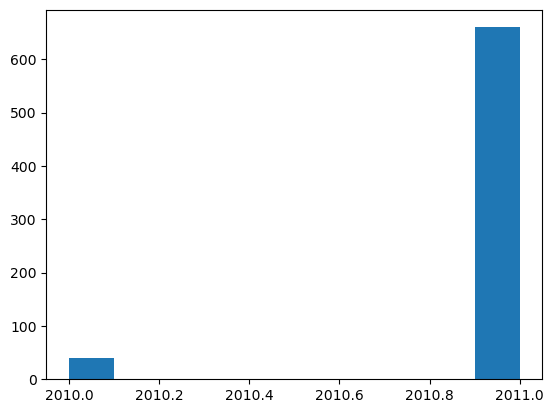

In [11]:
plt.hist(df['year']) # histogeram shows the density of years

<AxesSubplot:xlabel='year', ylabel='OrderValue'>

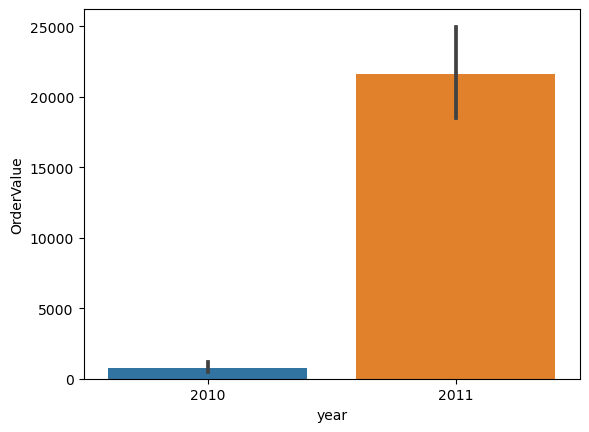

In [15]:
sns.barplot(x='year',y='OrderValue',data=df,estimator=np.sum) # bar plot shows the sum of orders values of each year